## Working with AIMIP data (old fashioned way)

In [2]:
import xarray as xr
import s3fs

In [3]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://s3.eu-dkrz-1.dkrz.cloud'},anon=True)

We can now access data in a way similar is if it would be on the classical file system

List all the folders (organisations) available in `ai-mip` folder:

In [22]:
fs.glob('ai-mip/*')

['ai-mip/Ai2',
 'ai-mip/ArchesWeather',
 'ai-mip/Google',
 'ai-mip/MPI-M',
 'ai-mip/NVIDIA',
 'ai-mip/UMD-PARETO']

We can list subfolders:

In [25]:
fs.glob('ai-mip/ArchesWeather/*')

['ai-mip/ArchesWeather/ArchesWeather-V2',
 'ai-mip/ArchesWeather/ArchesWeatherGen-V2',
 'ai-mip/ArchesWeather/README.txt']

And so on:

In [26]:
fs.glob('ai-mip/ArchesWeather/ArchesWeather-V2/*')

['ai-mip/ArchesWeather/ArchesWeather-V2/aimip']

Unfortunatelly some details of subfolder structure is still different between models, so one has to explore the paths.

As soon as we know where the data we are interested in are located, we can select several variables:

In [27]:
files = fs.glob('ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/*/gn/*')
files

['ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/hus/gn/hus_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/psl/gn/psl_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/ta/gn/ta_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/tas/gn/tas_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/tos/gn/tos_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/ua/gn/ua_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/uas/gn/uas_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/va/gn/va_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-20

You can select just a few variables you need:

In [29]:
selected_vars = ['tas', 'tos', 'ua', 'va']
selected_files = [f for f in files if any(f"/{var}/" in f for var in selected_vars)]
selected_files

['ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/tas/gn/tas_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/tos/gn/tos_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/ua/gn/ua_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
 'ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/va/gn/va_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc']

And you can open them as a single xarray dataset (will take some time):

In [30]:
# Use fs.open() explicitly to create file objects
open_files = [fs.open(f) for f in selected_files]

# Open files with Xarray
ds = xr.open_mfdataset(
    open_files,
    engine='h5netcdf',
    combine='by_coords'
)

ds

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 556, lat: 181, lon: 360, bnds: 2, plev: 7)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1978-10-16 ... 2025-01-01
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
    height     float64 8B ...
  * plev       (plev) float64 56B 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 145MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    time_bnds  (time, bnds) datetime64[ns] 9kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(181, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
    tos        (time, lat, lon) float32 145MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    ua         (time, plev, lat, lon) float32 1GB dask.array<chunksize=(1, 7, 181, 360), meta=np.ndarray>
    va         (time, plev, lat, lon) float32 1GB dask.array<chunksize=(1, 7, 181, 360), meta=np.ndarray>
Attributes: (12/47)
    CDI:                   Climate Data Interface version 1.9.9 (https://mpim...
    Conventions:           CF-1.7 CMIP-6.2
    frequency:             mon
    CDO:                   Climate Data Operators version 1.9.9 (https://mpim...
    variable_id:           tas
    activity_id:           AIMIP
    ...                    ...
    variant_label:         r1i1p1f1
    license:               
    cmor_version:          3.5.0
    tracking_id:           0d300ce9-7c21-4f99-a3d3-e746329461f9
    history:               Mon Dec 15 17:39:43 2025: ncatted -O -a coordinate...
    NCO:                   netCDF Operators version 5.2.4 (Homepage = http://...

So, two and 3 dimentional data are well combined.

You can work with data from the cloud:

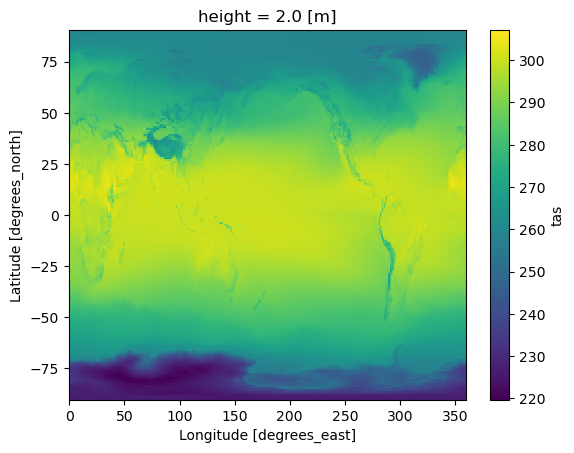

In [31]:
ds['tas'].sel(time=slice('2000-01-01', '2003-12-31')).mean(dim='time').plot()

Another option is to download data to work locally:

You can do it file by file:

In [32]:
fs.get('ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/hus/gn/hus_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc',
       './hus_Amon_ArchesWeather_aimip_r1i1p1f1_gn_197810-202501.nc', recursive=True)

[None]

Or download everything from the subfolder (might take a lot of time):

In [ ]:
fs.get('ai-mip/ArchesWeather/ArchesWeather-V2/aimip/r1i1p1f1/Amon/',
       './ArchesWeather/', recursive=True)